### 1. Importing packages

In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Loading dataset

In [ ]:
tweets_df = pd.read_csv('cleaned-tsla-tweets.csv', lineterminator='\n')
tweets_df = tweets_df.iloc[:, [0, 1, 4]]
tweets_df.head()

,id,date,cleaned_tweet
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             113741 non-null  int64 
 1   date           113741 non-null  object
 2   cleaned_tweet  109112 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
# converting date column into datetime type
tweets_df.date = pd.to_datetime(tweets_df.date)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113741 entries, 0 to 113740
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             113741 non-null  int64         
 1   date           113741 non-null  datetime64[ns]
 2   cleaned_tweet  109112 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.6+ MB


In [ ]:
# checking for null values
tweets_df.isnull().sum()

id                  0
date                0
cleaned_tweet    4629
dtype: int64

In [ ]:
# dropping null values
tweets_df = tweets_df.dropna()

### 3. Calculating sentiment scores

In [ ]:
# using TextBlob to get sentiment scores
tweets_df['sentiment_score'] = tweets_df.apply(lambda row: TextBlob(row.cleaned_tweet).sentiment[0], axis=1)
tweets_df.head()

,id,date,cleaned_tweet,sentiment_score
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands su...,0.15
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply c...,0.20
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two...,0.75


In [ ]:
# previewing how sentiment scores differ in different tweets
pd.options.display.max_colwidth = 300
random_subset = tweets_df.sample(n=10)
random_subset = random_subset.drop(columns=['id', 'date'])
random_subset = random_subset.rename(columns={'tweet': 'Original Tweet', 
                                              'cleaned_tweet': 'Cleaned Tweet', 
                                              'sentiment_score':'Sentiment Score'})
random_subset.head(10)

,Cleaned Tweet,Sentiment Score
69872,amzn goog aapl,0.000000
73952,know best analysis amp alert come trial service,1.000000
2581,break news inc close new high market cap record b motors nasda ev automotive,0.148182
16286,trumpery elon take money experience dude week,0.000000
11145,bot mar th put spread,0.000000
49880,spy gspc aapl nflx goog microsoft stock hit new time high first since february,0.182121
5459,hotpockets ever wheel fortune hodlbaggins spartantrader like tendency hyperbole happen find way eventually sell million ev w w annually half toyota really outlandish number,0.016667
11982,bullish ly factory open,0.000000
91499,release result destroys revenue profit expectation electrek,0.000000
86137,moon river know facetious consider lack little big barron fun mum picture would bet entire portfolio minus share unless camera socially distant time,-0.014583


In [ ]:
tweets_df.shape

(109112, 4)

### 4. Frequency analysis

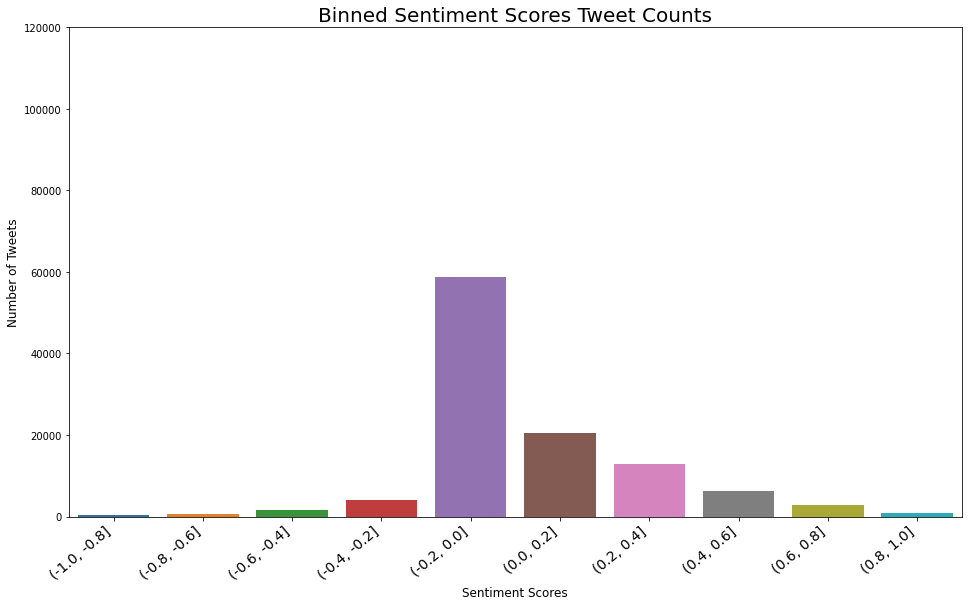

In [ ]:
# plotting counts of tweets for binned sentiment scores
bins = [-1.0, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1]
tweets_df['bin'] = pd.cut(tweets_df['sentiment_score'], bins)
plt.figure(figsize=(16,9))
ax = sns.countplot(x=tweets_df['bin'])
ax.set_ylabel('Number of Tweets', fontsize=12)
ax.set_xlabel('Sentiment Scores', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=14)
ax.set_title('Binned Sentiment Scores Tweet Counts', fontsize=20)
ax.set_ylim(0, 120000)
plt.show()

### 5. Calculating daily average sentiment scores

In [ ]:
daily_sentiment_scores_df = tweets_df[['date', 'sentiment_score']]
daily_sentiment_scores_df.head()

,date,sentiment_score
0,2020-01-02,0.15
1,2020-01-02,-0.20
2,2020-01-02,0.20
3,2020-01-02,0.00
4,2020-01-02,0.75


In [ ]:
# daily average sentiment scores
daily_sentiment_scores_df = daily_sentiment_scores_df.resample('D', on='date').mean()
daily_sentiment_scores_df.head()

,sentiment_score
date,
2020-01-01,0.099938
2020-01-02,0.111398
2020-01-03,0.073760
2020-01-04,0.083606
2020-01-05,0.086658


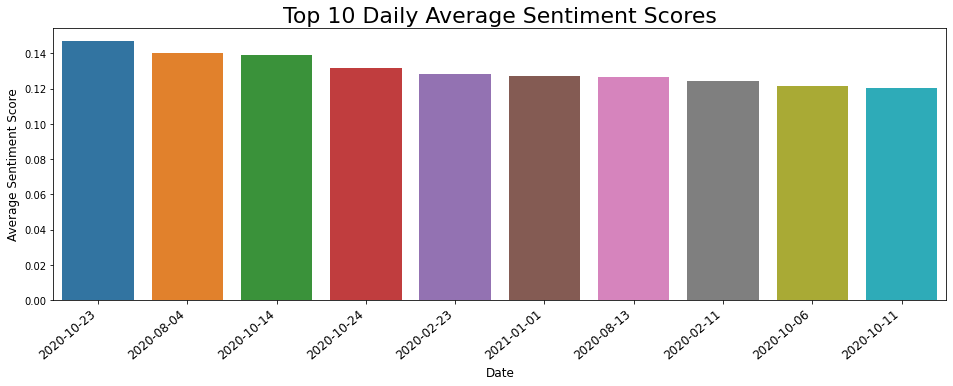

In [ ]:
# plotting top 10 daily average sentiment scores
top_avg_df = daily_sentiment_scores_df.nlargest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=top_avg_df, x=top_avg_df.index.date, y=top_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Top 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

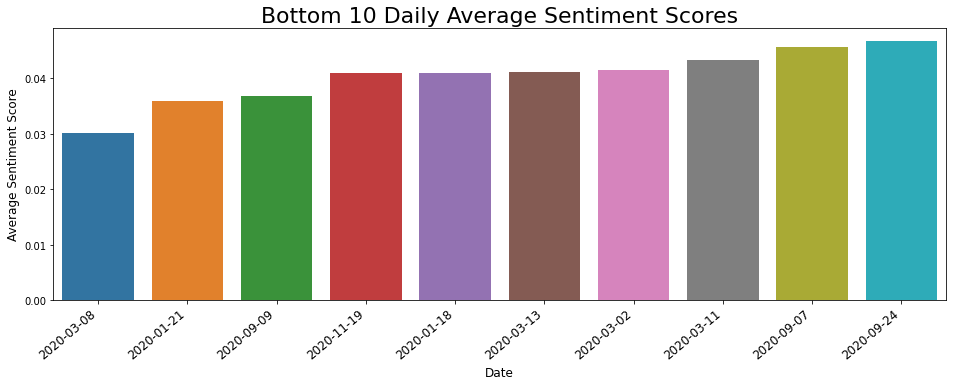

In [ ]:
# plotting bottom 10 daily average sentiment scores
bottom_avg_df = daily_sentiment_scores_df.nsmallest(columns='sentiment_score', n=10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=bottom_avg_df, x=bottom_avg_df.index.date, y=bottom_avg_df['sentiment_score'])
ax.set_ylabel('Average Sentiment Score', fontsize=12)
ax.set_xlabel('Date', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right', fontsize=12)
ax.set_title('Bottom 10 Daily Average Sentiment Scores', fontsize=22)
plt.show()

### 6. Removing tweets with zero sentiment scores

In [ ]:
tweets_df1 = tweets_df.copy()
tweets_df1.head()

,id,date,cleaned_tweet,sentiment_score,bin
0,1212450794705969152,2020-01-02,fun fact audi register e tron netherlands sux combine obviously order magnitude,0.15,"(0.0, 0.2]"
1,1212450579634626560,2020-01-02,mf stock watch shit go damn year miss curve,-0.20,"(-0.4, -0.2]"
2,1212450337543602177,2020-01-02,icannot enough june th within day low reply charts never short lol,0.20,"(0.0, 0.2]"
3,1212450309131227141,2020-01-02,gain momentum taiwan ownerstwn taiwan,0.00,"(-0.2, 0.0]"
4,1212449703318753280,2020-01-02,schuldensuehner extrapolate number another two year consider amp occur ice company scramble survive look like successful,0.75,"(0.6, 0.8]"


In [ ]:
# checking tweets with zero sentiment scores
(tweets_df1.sentiment_score == 0).sum()

48917

In [ ]:
# removing tweets with zero sentiment scores
tweets_df1 = tweets_df1[tweets_df1.sentiment_score !=0 ]
(tweets_df1.sentiment_score == 0).sum()

0

In [ ]:
# daily average sentiment scores without zero sentiment scores
tweets_df1 = tweets_df1.groupby(['date'], as_index=False).mean()

In [ ]:
# checking for null values
tweets_df1.isnull().sum()

date               0
id                 0
sentiment_score    0
dtype: int64

In [ ]:
# adding final average sentiment scores
daily_sentiment_scores_df['sentiment_score_final'] = tweets_df1.sentiment_score.values
daily_sentiment_scores_df.head()

,sentiment_score,sentiment_score_final
date,,
2020-01-01,0.099938,0.154961
2020-01-02,0.111398,0.161528
2020-01-03,0.073760,0.128297
2020-01-04,0.083606,0.144796
2020-01-05,0.086658,0.132267


### 7. Saving sentiment analysis results

In [ ]:
daily_sentiment_scores_df.to_csv('daily-avg-sentiment-scores.csv')